In [62]:
"""
BUAN 6341: Applied Machine Learning
Homework 1_Logistic Regression

Siddhartha Shankar
"""
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import random
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

"C:\\Users\\s_s11\\OneDrive\\Desktop\\Sem 4 - Fall'19\\Applied Machine Learning\\Homework\\Homework 2"

In [3]:
energy_data = pd.read_csv("energydata_complete.csv")
energy_data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,17.000000,45.290000,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,...,17.000000,45.290000,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,17.000000,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,17.000000,45.290000,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,17.000000,45.290000,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


In [4]:
print(energy_data.isnull().any())
print(energy_data.isnull().sum())

date           False
Appliances     False
lights         False
T1             False
RH_1           False
T2             False
RH_2           False
T3             False
RH_3           False
T4             False
RH_4           False
T5             False
RH_5           False
T6             False
RH_6           False
T7             False
RH_7           False
T8             False
RH_8           False
T9             False
RH_9           False
T_out          False
Press_mm_hg    False
RH_out         False
Windspeed      False
Visibility     False
Tdewpoint      False
rv1            False
rv2            False
dtype: bool
date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press

In [5]:
energy_data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [6]:
new_energy = energy_data.filter(['Appliances'], axis=1)
new_energy.describe()

,Appliances
count,19735.000000
mean,97.694958
std,102.524891
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


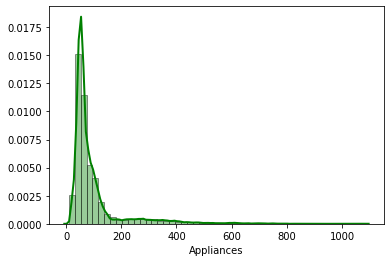

In [7]:
sb.distplot(energy_data['Appliances'], hist=True, kde=True, 
             bins= 50, color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

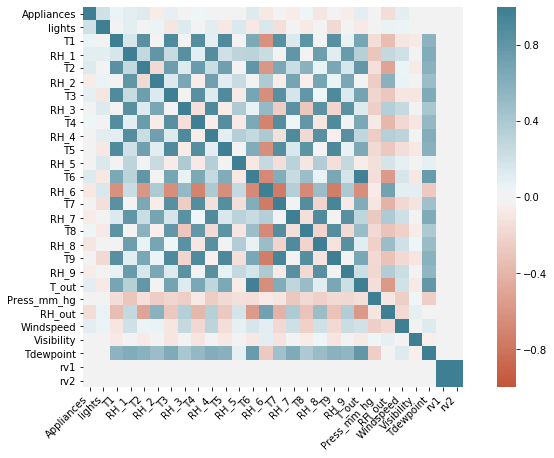

In [8]:
# Correlation Matrix

import seaborn as sb
corr = energy_data.corr()
plt.figure(figsize=(12,7))
ax = sb.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [9]:
energy_data1 = energy_data.drop(columns=['date','lights', 'T6','RH_6','T8','RH_8','T9','RH_9','rv1', 'rv2', 'Visibility'])
energy_data1.shape


(19735, 18)

In [10]:
energy_data1 = energy_data1.round(3)
energy_data1

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T7,RH_7,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint
0,60,19.890,47.597,19.200,44.790,19.790,44.730,19.000,45.567,17.167,55.200,17.200,41.627,6.600,733.500,92.000,7.000,5.300
1,60,19.890,46.693,19.200,44.722,19.790,44.790,19.000,45.992,17.167,55.200,17.200,41.560,6.483,733.600,92.000,6.667,5.200
2,50,19.890,46.300,19.200,44.627,19.790,44.933,18.927,45.890,17.167,55.090,17.200,41.433,6.367,733.700,92.000,6.333,5.100
3,50,19.890,46.067,19.200,44.590,19.790,45.000,18.890,45.723,17.167,55.090,17.133,41.290,6.250,733.800,92.000,6.000,5.000
4,60,19.890,46.333,19.200,44.530,19.790,45.000,18.890,45.530,17.200,55.090,17.200,41.230,6.133,733.900,92.000,5.667,4.900
5,50,19.890,46.027,19.200,44.500,19.790,44.933,18.890,45.730,17.133,55.030,17.133,41.260,6.017,734.000,92.000,5.333,4.800
6,60,19.890,45.767,19.200,44.500,19.790,44.900,18.890,45.790,17.100,54.967,17.133,41.200,5.900,734.100,92.000,5.000,4.700
7,60,19.857,45.560,19.200,44.500,19.730,44.900,18.890,45.863,17.100,54.900,17.100,41.200,5.917,734.167,91.833,5.167,4.683
8,60,19.790,45.598,19.200,44.433,19.730,44.790,18.890,45.790,17.167,55.000,17.167,41.400,5.933,734.233,91.667,5.333,4.667
9,70,19.857,46.090,19.230,44.400,19.790,44.863,18.890,46.097,17.100,55.000,17.200,41.500,5.950,734.300,91.500,5.500,4.650


In [11]:
energy_data1['Appliances'] = np.where(energy_data1['Appliances']<= 100,0,1)
print(energy_data1)

       Appliances      T1    RH_1      T2    RH_2      T3    RH_3      T4  \
0               0  19.890  47.597  19.200  44.790  19.790  44.730  19.000   
1               0  19.890  46.693  19.200  44.722  19.790  44.790  19.000   
2               0  19.890  46.300  19.200  44.627  19.790  44.933  18.927   
3               0  19.890  46.067  19.200  44.590  19.790  45.000  18.890   
4               0  19.890  46.333  19.200  44.530  19.790  45.000  18.890   
5               0  19.890  46.027  19.200  44.500  19.790  44.933  18.890   
6               0  19.890  45.767  19.200  44.500  19.790  44.900  18.890   
7               0  19.857  45.560  19.200  44.500  19.730  44.900  18.890   
8               0  19.790  45.598  19.200  44.433  19.730  44.790  18.890   
9               0  19.857  46.090  19.230  44.400  19.790  44.863  18.890   
10              1  19.927  45.863  19.357  44.400  19.790  44.900  18.890   
11              1  20.067  46.397  19.427  44.400  19.790  44.827  19.000   

In [12]:
new_energy = energy_data1.filter(['Appliances'], axis=1)
new_energy.describe()

,Appliances
count,19735.000000
mean,0.214492
std,0.410480
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [13]:
Y = energy_data1.iloc[:,0]
print(Y.shape)
X = energy_data1.iloc[:,1:18]
X.shape

(19735,)


(19735, 17)

In [14]:
import random
from sklearn.model_selection import train_test_split
random.seed(144)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(15788, 17) (15788,)
(3947, 17) (3947,)


In [15]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [16]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=False, random_state=0)

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)
predictions = logmodel.predict(X_test)

confusion_matrix = confusion_matrix(Y_test, predictions)
print(confusion_matrix)

print(classification_report(Y_test,predictions))
print("Accuracy Score: {}".format(round(accuracy_score(Y_test, predictions),3)*100))

CV_score_LogModel = (cross_val_score(logmodel, X, Y, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
Logistic_CV = round(CV_score_LogModel,2)*100
print("Cross-Validation Score: {}".format(Logistic_CV))

[[3020   92]
 [ 655  180]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      3112
           1       0.66      0.22      0.33       835

    accuracy                           0.81      3947
   macro avg       0.74      0.59      0.61      3947
weighted avg       0.79      0.81      0.77      3947

Accuracy Score: 81.10000000000001
Cross-Validation Score: 80.0


In [32]:
from sklearn.model_selection import learning_curve

def lrng_curve(classifier,n):
    train_sizes, train_scores, test_scores = learning_curve(classifier, X_train, Y_train, cv=k_fold, scoring='accuracy',n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, n))

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    # Create plot
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

In [47]:
from sklearn.model_selection import learning_curve

def lrng_curve_roc_auc(classifier,n):
    train_sizes, train_scores, test_scores = learning_curve(classifier, X_train, Y_train, cv=k_fold, scoring='roc_auc',n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, n))

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    # Create plot
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("roc_auc"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

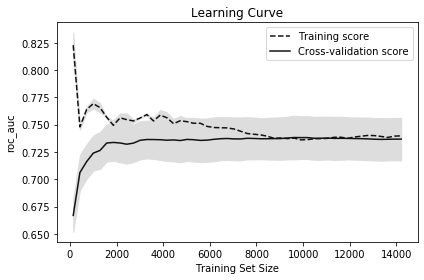

In [48]:
lrng_curve_roc_auc(LogisticRegression(),50)

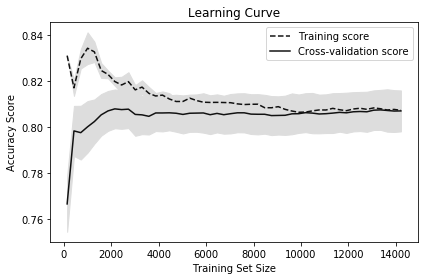

In [19]:
lrng_curve(LogisticRegression(),50)

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, Y_train)

svcpred = svc.predict(X_test)

print(confusion_matrix(Y_test, svcpred))
print(classification_report(Y_test,svcpred))
print("Accuracy Score: {}".format(round(accuracy_score(Y_test, svcpred),3)*100))

CV_score_SVC_sigmoid = (cross_val_score(svc, X, Y, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
SVM_CV_sigmoid = round(CV_score_SVC_sigmoid,3)*100
print("Cross-Validation Score: {}".format(SVM_CV_sigmoid))

[[2489  623]
 [ 615  220]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      3112
           1       0.26      0.26      0.26       835

    accuracy                           0.69      3947
   macro avg       0.53      0.53      0.53      3947
weighted avg       0.69      0.69      0.69      3947

Accuracy Score: 68.60000000000001
Cross-Validation Score: 78.60000000000001


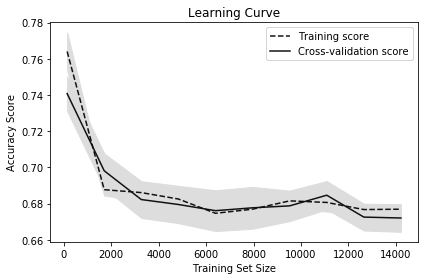

In [21]:
lrng_curve(SVC(kernel= 'sigmoid'),10)

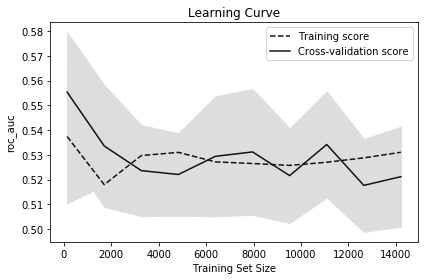

In [52]:
lrng_curve_roc_auc(SVC(kernel= 'sigmoid'),10)

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

svc_linear = SVC(kernel = 'linear')
svc_linear.fit(X_train, Y_train)

svcpred_linear = svc_linear.predict(X_test)

print(confusion_matrix(Y_test, svcpred_linear))
print(classification_report(Y_test,svcpred_linear))
print("Accuracy Score: {}".format(round(accuracy_score(Y_test, svcpred_linear),3)*100))

CV_score_SVC_linear = (cross_val_score(svc_linear, X_train, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
SVM_CV_linear = round(CV_score_SVC_linear,3)*100
print("Cross-Validation Score: {}".format(SVM_CV_linear))

[[3112    0]
 [ 835    0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      3112
           1       0.00      0.00      0.00       835

    accuracy                           0.79      3947
   macro avg       0.39      0.50      0.44      3947
weighted avg       0.62      0.79      0.70      3947

Accuracy Score: 78.8
Cross-Validation Score: 78.5


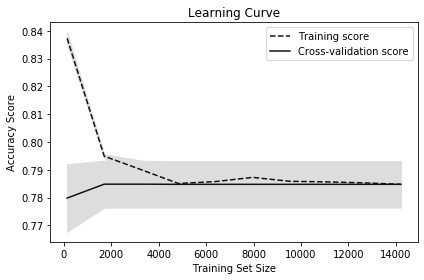

In [23]:
lrng_curve(SVC(kernel = 'linear'),10)

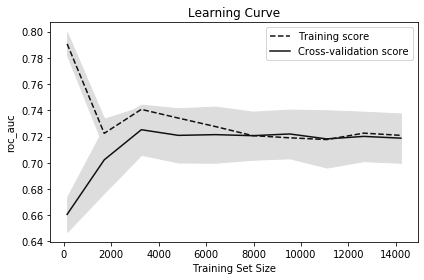

In [54]:
lrng_curve_roc_auc(SVC(kernel= 'linear'),10)

In [70]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

svc_gaussian = SVC(kernel = 'rbf')
svc_gaussian.fit(X_train, Y_train)

svcpred_gaussian = svc_gaussian.predict(X_test)

print(confusion_matrix(Y_test, svcpred_gaussian))
print(classification_report(Y_test,svcpred_gaussian))
print("Accuracy Score: {}".format(round(accuracy_score(Y_test, svcpred_gaussian),3)*100))

CV_score_SVC_gaussian = (cross_val_score(svc_gaussian, X_train, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
SVM_CV_gaussian = round(CV_score_SVC_gaussian,3)*100
print("Cross-Validation Score: {}".format(SVM_CV_gaussian))

[[3029   83]
 [ 549  286]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      3112
           1       0.78      0.34      0.48       835

    accuracy                           0.84      3947
   macro avg       0.81      0.66      0.69      3947
weighted avg       0.83      0.84      0.81      3947

Accuracy Score: 84.0
Cross-Validation Score: 83.3


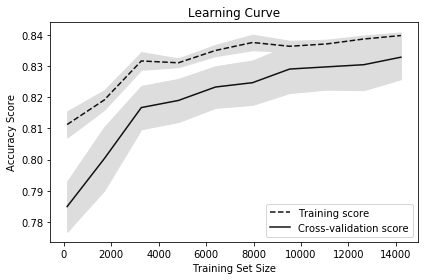

In [56]:
lrng_curve(SVC(kernel = 'rbf'),10)

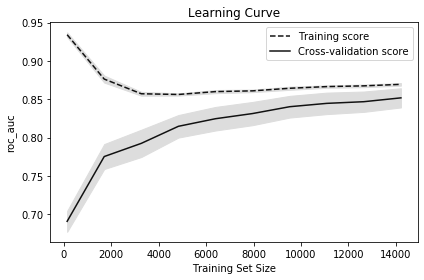

In [57]:
lrng_curve_roc_auc(SVC(kernel = 'rbf'),10)

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

d_tree = DecisionTreeClassifier(criterion='gini', max_depth = 5) #criterion = entopy, gini
d_tree.fit(X_train, Y_train)
d_tree_pred = d_tree.predict(X_test)

print(confusion_matrix(Y_test, d_tree_pred))
print(classification_report(Y_test,d_tree_pred))
print("Accuracy Score: {}".format(round(accuracy_score(Y_test, d_tree_pred),3)*100))

CV_score_dtree = (cross_val_score(d_tree, X_train, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
d_tree_CV = round(CV_score_dtree,3)*100
print("Cross-Validation Score: {}".format(d_tree_CV))

[[3063   49]
 [ 676  159]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      3112
           1       0.76      0.19      0.30       835

    accuracy                           0.82      3947
   macro avg       0.79      0.59      0.60      3947
weighted avg       0.81      0.82      0.77      3947

Accuracy Score: 81.6
Cross-Validation Score: 80.80000000000001


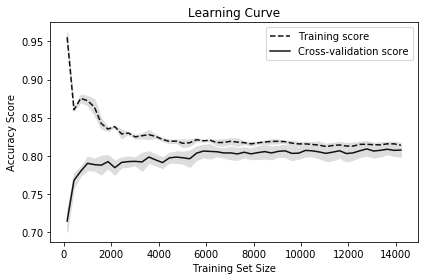

In [25]:
lrng_curve(DecisionTreeClassifier(criterion='gini', max_depth = 5) ,50)

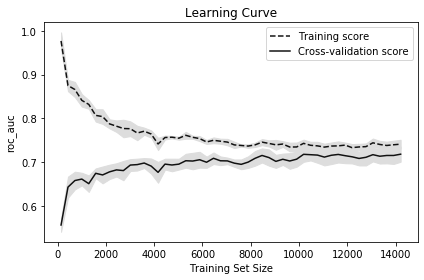

In [60]:
lrng_curve_roc_auc(DecisionTreeClassifier(criterion='gini', max_depth = 5) ,50)

In [71]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoost_classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=200
)
AdaBoost_classifier.fit(X_train, Y_train)
Imp_features = AdaBoost_classifier.feature_importances_

AdaBoost_pred = AdaBoost_classifier.predict(X_test)

print(confusion_matrix(Y_test, AdaBoost_pred))
print(classification_report(Y_test,AdaBoost_pred))
print("Accuracy Score: {}".format(round(accuracy_score(Y_test, AdaBoost_pred),3)*100))

CV_Score_AdaBoost = (cross_val_score(AdaBoost_classifier, X_train, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
AdaBoost_CV = round(CV_Score_AdaBoost,3)*100
print("Cross-Validation Score: {}".format(AdaBoost_CV))

[[2943  169]
 [ 396  439]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      3112
           1       0.72      0.53      0.61       835

    accuracy                           0.86      3947
   macro avg       0.80      0.74      0.76      3947
weighted avg       0.85      0.86      0.85      3947

Accuracy Score: 85.7
Cross-Validation Score: 85.3


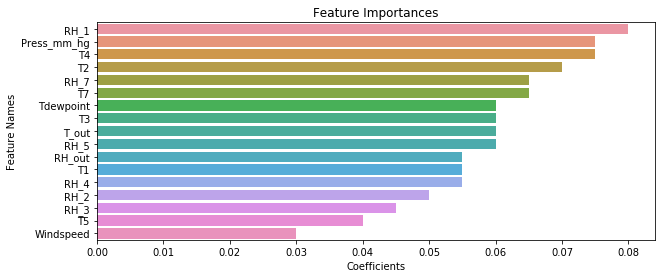

In [66]:
Imp_features = AdaBoost_classifier.feature_importances_

def plotfeatureimportances(train, importance):
    #Plots importance in a sorted order and shows the most significant variables at the top
    X = list(train.columns)
    X.remove('Appliances')
    feature_importance_df = pd.DataFrame(data = importance, index = X, columns=['coefficient_values'])
    feature_importance_df['sort'] = feature_importance_df.coefficient_values.abs()
    sorted_feature_imp_df = feature_importance_df.sort_values(by='sort', ascending=False).drop('sort', axis=1)
    fig, ax = plt.subplots()
    fig.set_size_inches(10,4)
    sb.barplot(np.array(sorted_feature_imp_df.coefficient_values), np.array(sorted_feature_imp_df.index.values))
    plt.title('Feature Importances')
    plt.xlabel('Coefficients')
    plt.ylabel('Feature Names')
    
plotfeatureimportances(energy_data1,Imp_features)

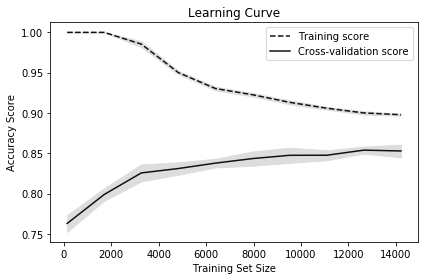

In [73]:
lrng_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=200),10)

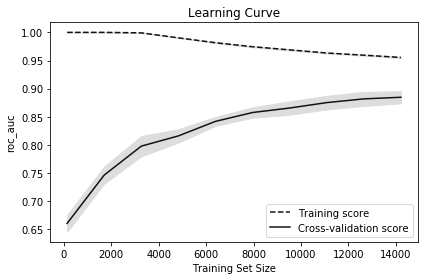

In [74]:
lrng_curve_roc_auc(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=200),10)

In [72]:
models = pd.DataFrame({
                'Models': ['Logistic Model','SVM: kernel=sigmoid','SVM: kernel=linear','SVM: kernel=Gaussian','Decision Tree Classifier',
                           'AdaBoost Classifier'],
                'Accuracy':  [Logistic_CV, SVM_CV_sigmoid, SVM_CV_linear, SVM_CV_gaussian,d_tree_CV, AdaBoost_CV]})

models.sort_values(by='Accuracy', ascending=False)

,Models,Accuracy
5,AdaBoost Classifier,85.3
3,SVM: kernel=Gaussian,83.3
4,Decision Tree Classifier,80.8
0,Logistic Model,80.0
1,SVM: kernel=sigmoid,78.6
2,SVM: kernel=linear,78.5


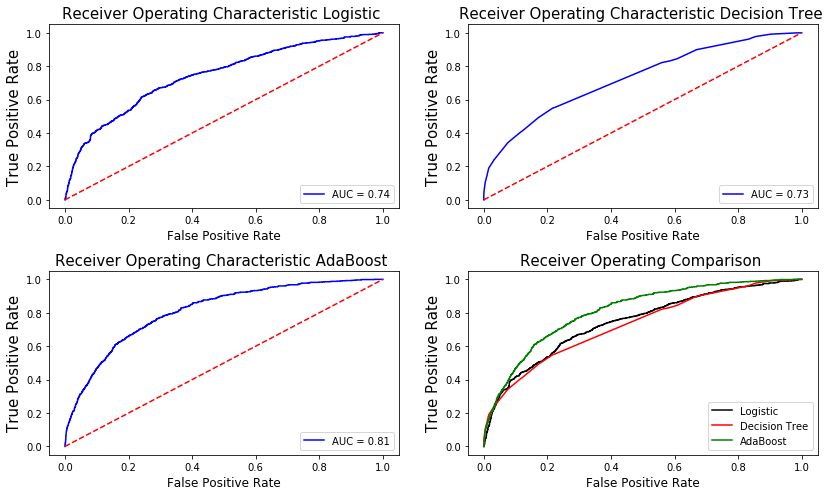

In [30]:
#ROCR curve comparison

#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 4))
fig, ax_arr = plt.subplots(nrows = 2, ncols = 2, figsize = (12,7))

# Logistic Model
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(Y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=15)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=12)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 10})

# Decision Tree Classifier
probs = d_tree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(Y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[0,1].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Decision Tree ',fontsize=15)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=12)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 10})

# AdaBoost Classifier
probs = AdaBoost_classifier.predict_proba(X_test)
preds = probs[:,1]
fprada, tprada, thresholdada = metrics.roc_curve(Y_test, preds)
roc_aucada = metrics.auc(fprada, tprada)

ax_arr[1,0].plot(fprada, tprada, 'b', label = 'AUC = %0.2f' % roc_aucada)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic AdaBoost ',fontsize=15)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=12)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 10})

#ALL PLOTS ----------------------------------
ax_arr[1,1].plot(fprlog, tprlog, 'b', label = 'Logistic', color='black')
ax_arr[1,1].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='red')
ax_arr[1,1].plot(fprada, tprada, 'b', label = 'AdaBoost', color='green')
ax_arr[1,1].set_title('Receiver Operating Comparison ',fontsize=15)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=12)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 10})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 